Missing values:
 EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64
       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore  \
count  100.000000  100.000000    100.000000      100.000000        100.000000   
mean    50.500000   36.570000  72820.000000       10.800000         84.940000   
std     29.011492    8.318478  12643.823102        6.361183          6.349771   
min      1.000000   25.000000  43000.000000        1.000000         70.000000   
25%     25.750000   29.750000  65000.000000        5.000000         80.000000   
50%     50.500000   35.000000  72000.000000       10.000000         85.500000   
75%     75.250000   41.250000  82750.000000       16.000000         90.000000   
max    100.000000   60.000000  95000.000000       25.000000         95.000000   

        Attrition  
count  100.000000  
mean     0.390000  
std 

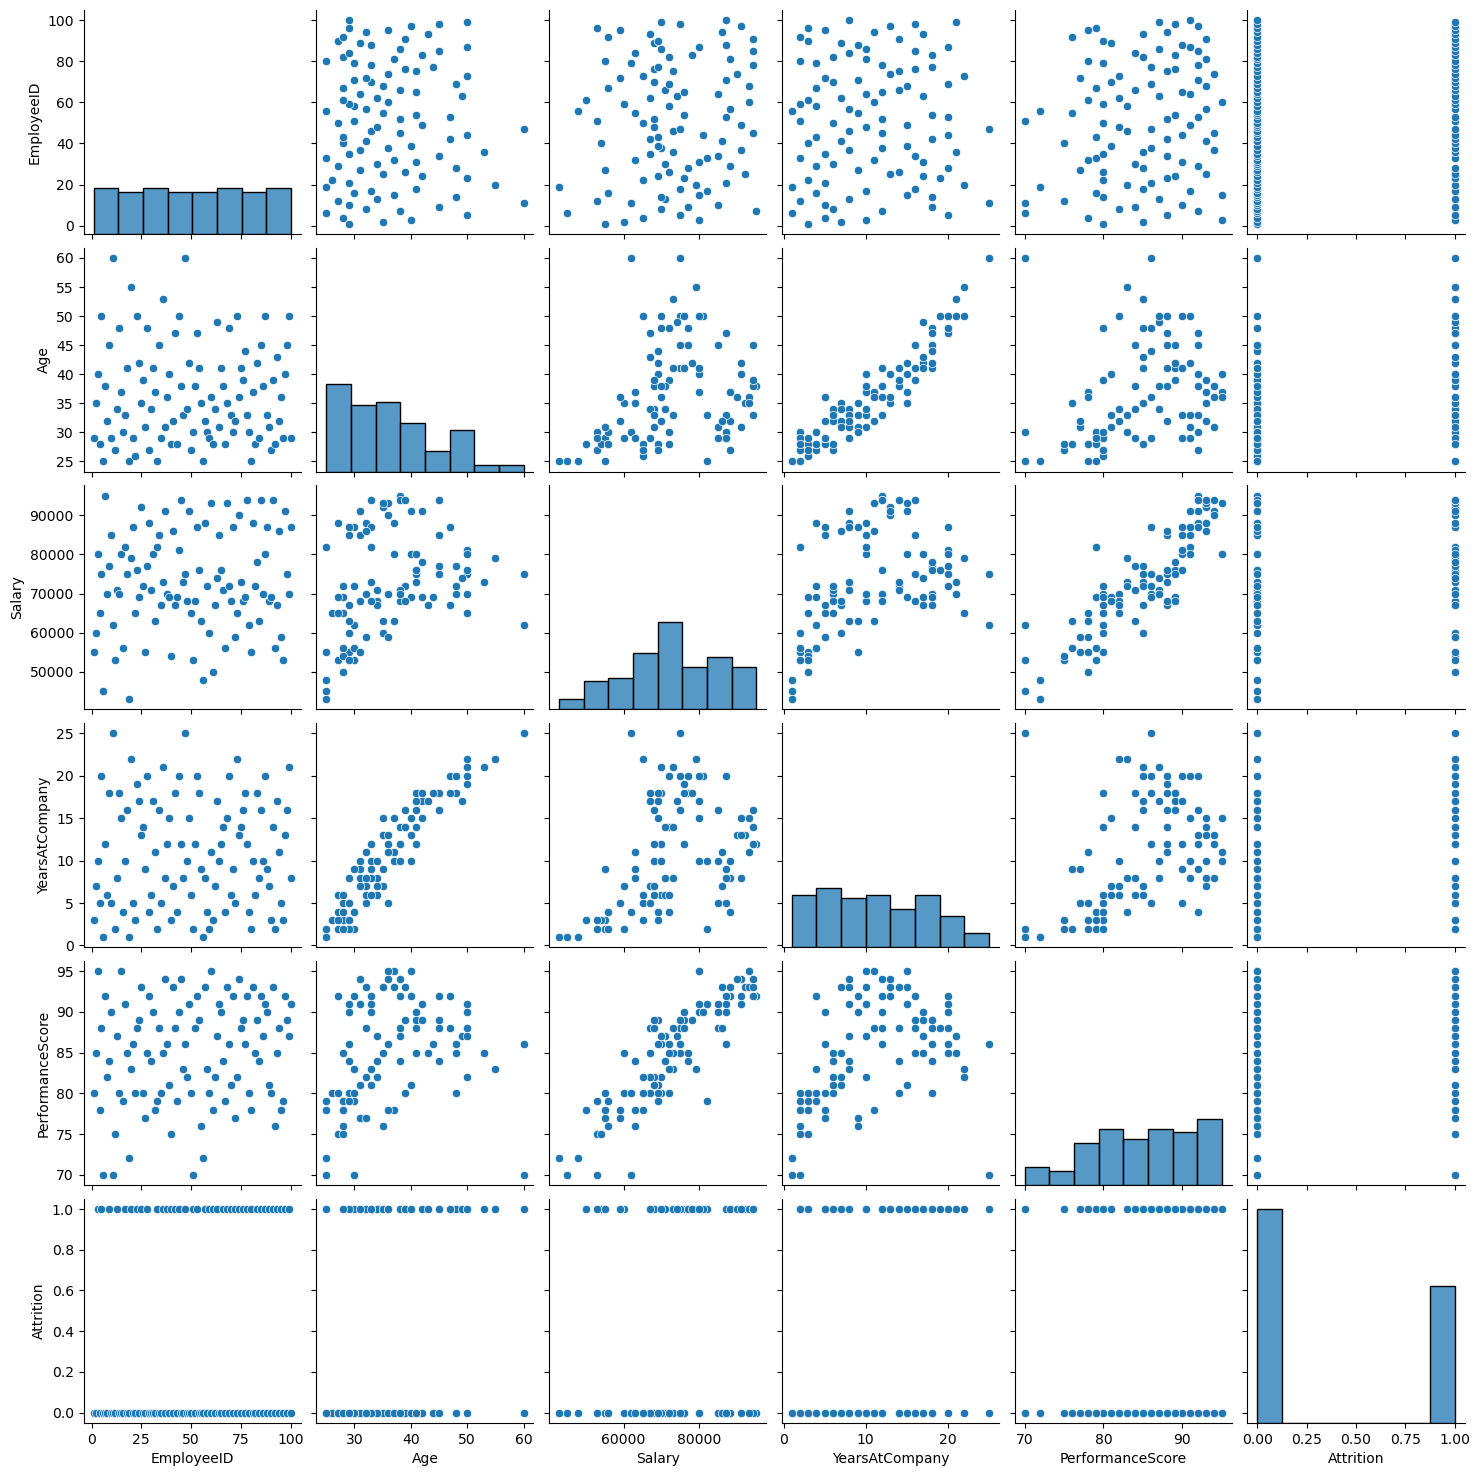

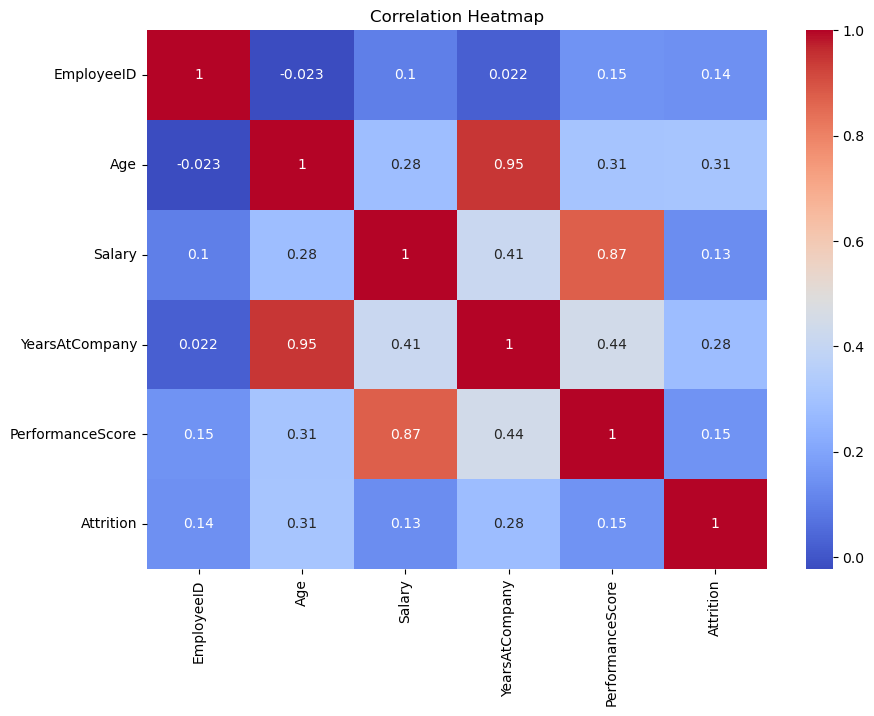

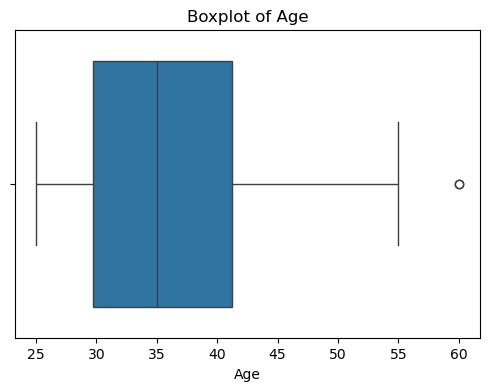

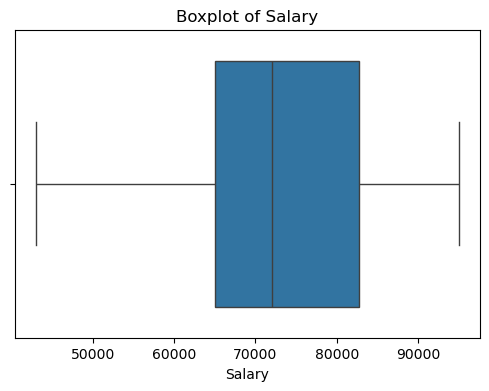

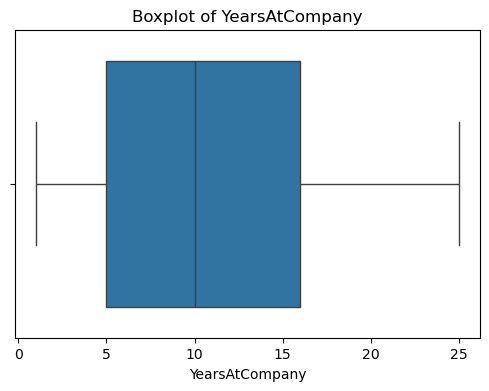

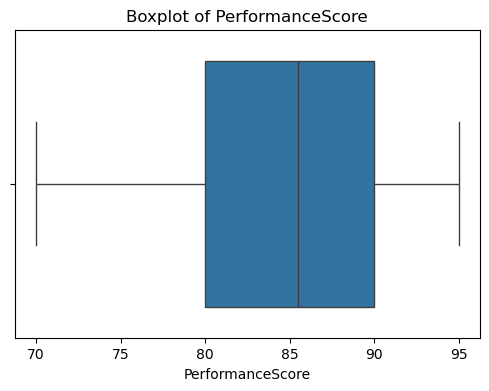

Probability of attrition by department:
 Department
Engineering    0.428571
HR             0.346154
Marketing      0.200000
Sales          0.538462
Name: Attrition, dtype: float64
Probability of attrition given PerformanceScore <= 85.5: 0.32
ANOVA test result for PerformanceScore across Departments: F_onewayResult(statistic=25.781068086646336, pvalue=2.5591493445552222e-12)
Logistic Regression Results for Attrition Prediction:
Accuracy: 0.6
Precision: 0.4
Recall: 0.2857142857142857
F1 Score: 0.3333333333333333
Confusion Matrix:
 [[10  3]
 [ 5  2]]
Linear Regression Results for Performance Prediction:
R2 Score: 0.7487625823959115
Mean Squared Error: 0.020525092068583616


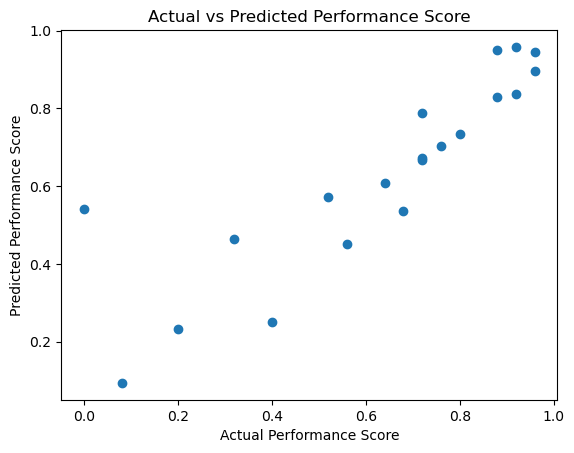

Random Forest Classifier Results for Attrition Prediction:
Accuracy: 0.65
Precision: 0.5
Recall: 0.5714285714285714
F1 Score: 0.5333333333333333
Confusion Matrix:
 [[9 4]
 [3 4]]


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from scipy.stats import f_oneway

# Load dataset
data = pd.read_csv('employee_data.csv')

# Step 1: Data Preprocessing
data = data.drop_duplicates()
print("Missing values:\n", data.isnull().sum())

# Encode 'Attrition' column (Yes=1, No=0)
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Step 2: Exploratory Data Analysis (EDA)
print(data.describe())

sns.pairplot(data.select_dtypes(include=[np.number]))
plt.show()

plt.figure(figsize=(10,7))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

num_features = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
for feature in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Step 3: Probability and Statistical Analysis
prob_attrition_by_dept = data.groupby('Department')['Attrition'].mean()
print("Probability of attrition by department:\n", prob_attrition_by_dept)

performance_median = data['PerformanceScore'].median()
low_perf = data[data['PerformanceScore'] <= performance_median]
p_attrition_given_low_perf = low_perf['Attrition'].mean()
print(f"Probability of attrition given PerformanceScore <= {performance_median}: {p_attrition_given_low_perf}")

groups = [group['PerformanceScore'].values for name, group in data.groupby('Department')]
anova_result = f_oneway(*groups)
print("ANOVA test result for PerformanceScore across Departments:", anova_result)

# Step 4: Feature Engineering & Encoding
scaler = MinMaxScaler()
data[['Salary', 'PerformanceScore']] = scaler.fit_transform(data[['Salary', 'PerformanceScore']])

le = LabelEncoder()
data['Department_encoded'] = le.fit_transform(data['Department'])

# Step 5: Employee Attrition Prediction Model
X_attr = data[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'Department_encoded']]
y_attr = data['Attrition']
X_train_attr, X_test_attr, y_train_attr, y_test_attr = train_test_split(X_attr, y_attr, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train_attr, y_train_attr)
y_pred_attr = logreg.predict(X_test_attr)

print("Logistic Regression Results for Attrition Prediction:")
print("Accuracy:", accuracy_score(y_test_attr, y_pred_attr))
print("Precision:", precision_score(y_test_attr, y_pred_attr))
print("Recall:", recall_score(y_test_attr, y_pred_attr))
print("F1 Score:", f1_score(y_test_attr, y_pred_attr))
print("Confusion Matrix:\n", confusion_matrix(y_test_attr, y_pred_attr))

# Step 6: Employee Performance Prediction Model
X_perf = data[['Age', 'Salary', 'YearsAtCompany', 'Department_encoded', 'Attrition']]
y_perf = data['PerformanceScore']
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train_perf, y_train_perf)
y_pred_perf = linreg.predict(X_test_perf)

print("Linear Regression Results for Performance Prediction:")
print("R2 Score:", r2_score(y_test_perf, y_pred_perf))
print("Mean Squared Error:", mean_squared_error(y_test_perf, y_pred_perf))

plt.scatter(y_test_perf, y_pred_perf)
plt.xlabel('Actual Performance Score')
plt.ylabel('Predicted Performance Score')
plt.title('Actual vs Predicted Performance Score')
plt.show()

# Additional: Random Forest Classifier for Attrition Prediction
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_attr, y_train_attr)
y_pred_rfc = rfc.predict(X_test_attr)

print("Random Forest Classifier Results for Attrition Prediction:")
print("Accuracy:", accuracy_score(y_test_attr, y_pred_rfc))
print("Precision:", precision_score(y_test_attr, y_pred_rfc))
print("Recall:", recall_score(y_test_attr, y_pred_rfc))
print("F1 Score:", f1_score(y_test_attr, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test_attr, y_pred_rfc))
